# 1.Abstracto

Este proyecto se centra en el desarrollo de un modelo predictivo de clasificación basado en los factores de salud y demográficos de individuos, con el objetivo de mejorar y acelerar el diagnóstico de la diabetes tipo 1, diabetes tipo 2 o la ausencia de la misma.

La motivación principal es abordar la necesidad crítica de métodos de cribado rápidos, no invasivos y rentables que puedan identificar individuos en riesgo de diabetes antes de requerir exámenes de laboratorio costosos y complejos. Al aprovechar características fácilmente accesibles como el Índice de Masa Corporal (BMI), las condiciones preexistentes (ej. hipertensión, colesterol) y los hábitos de vida, buscamos ofrecer una herramienta de apoyo a la decisión que permita a los profesionales de la salud priorizar la atención y la prevención.

Los principales beneficiarios de este análisis y del modelo resultante son:

*   Hospitales y Centros de Atención Primaria: Al integrar el modelo en sus flujos de admisión, pueden obtener una evaluación instantánea del riesgo, optimizando el uso de recursos diagnósticos especializados.
*   Médicos Generales y Personal de Enfermería: El modelo proporciona una herramienta de alerta temprana para tomar decisiones rápidas sobre la necesidad de realizar pruebas de glucosa más invasivas.
*   Investigadores en Salud Pública: El análisis de la importancia de las características ayuda a enfocar futuras campañas de prevención y políticas de salud.

# 2.Hipótesis
Las condiciones de salud preexistentes, como la presión arterial alta, el colesterol alto  y haber sufrido un ataque cardíaco, combinadas con factores demográficos de riesgo (edad, ingresos, cobertura médica), son predictores significativos y suficientes para clasificar con una precisión superior al 80% si un individuo tiene diabetes del tipo 1, 2 o no tenga esta enfermedad.

# 3.Analisis exploratorio de datos (EDA)

## Diccionario de Datos

*   Diabetes_012 (Variable objetivo) : Indica el diagnóstico de diabetes del individuo (0.0: No tiene diabetes, 1.0: Diabetes Tipo 1, 2.0: Diabetes Tipo 2).

*   HighBP (Predictora Binaria) : Indica si el individuo tiene hipertensión (0.0: No, 1.0: Sí).

*   HighChol (Predictora Binaria) : Indica si el individuo tiene Colesterol Alto (0.0: No, 1.0: Sí).

*   CholCheck (Predictora Binaria) : Indica si el individuo ha chequeado su colesterol en los últimos 5 años (0.0: No, 1.0: Sí).

*   BMI (Predictora Numérica Continua) : Índice de Masa Corporal (IMC/BMI). Valor numérico que mide el peso en relación con la altura (Valores flotantes, Ej. 12.0 a 99.0).

*   Smoker (Predictora Binaria) : Indica si el individuo ha fumado al menos 100 cigarrillos en toda su vida (0.0: No, 1.0: Sí).

*   Stroke (Predictora Binaria) : Indica si el individuo alguna vez ha sido diagnosticado con un Accidente Cerebrovascular (ACV) (0.0: No, 1.0: Sí).

*   HeartDiseaseorAttack (Predictora Binaria) : Indica si el individuo ha tenido una enfermedad cardíaca o un Ataque Cardíaco (Infarto) (0.0: No, 1.0: Sí).

*   PhysActivity (Predictora Binaria) : Indica si el individuo realizó actividad física en los últimos 30 días (0.0: No, 1.0: Sí).

*   Fruits (Predictora Binaria) : Indica si el individuo consume frutas al menos una vez al día (0.0: No, 1.0: Sí).

*   Veggies (Predictora Binaria) : Indica si el individuo consume vegetales al menos una vez al día (0.0: No, 1.0: Sí).

*   HvyAlcoholConsump (Predictora Binaria) : Consumo excesivo de alcohol (hombres: >14 bebidas por semana; mujeres: >7 bebidas por semana) (0.0: No, 1.0: Sí).

*   AnyHealthcare (Predictora Binaria) : Indica si el individuo tiene algún tipo de cobertura de salud (0.0: No, 1.0: Sí).

*   NoDocbcCost (Predictora Binaria) : Indica si el individuo no pudo ver a un médico en los últimos 12 meses debido a los costos (0.0: No, 1.0: Sí).

*   GenHlth (Predictora Ordinal) : Percepción de la salud general en una escala de 5 niveles (1.0 (Excelente) a 5.0 (Mala)).

*   MentHlth (Predictora Ordinal) : Número de días que el individuo reportó mala salud mental en los últimos 30 días (0.0 a 30.0).

*   PhysHlth (Predictora Ordinal) : Número de días que el individuo reportó mala salud física en los últimos 30 días (0.0 a 30.0).

*   DiffWalk (Predictora Binaria) : Indica si el individuo tiene serias dificultades para caminar (0.0: No, 1.0: Sí).

*   Sex (Predictora Binaria) : Género biológico reportado (0.0: Femenino, 1.0: Masculino).

*   Age (Predictora Ordinal) : Categoría de edad. Codificada en 13 grupos de 5 años (1.0 (18-24) a 13.0 (>80)).

*   Education (Predictora Ordinal) : Nivel de educación más alto alcanzado en 6 niveles (1.0 (Nunca asistió) a 6.0 (Universidad 4+ años)).

*   Income (Predictora Ordinal) : Nivel de ingresos anuales en 8 categorías (1.0 (< $10,000) a 8.0 (> $75,000)).



Se importan las librerias a utilizar y se crea la variable donde se guardaran los datos a utilizar.

In [1]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import confusion_matrix


path = 'https://raw.githubusercontent.com/Pancho28/modelo-diabetes/main/4_classification_diabetes.csv'
df = pd.read_csv(path)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Luego de cargarlos, estos se exploran un poco con las funciones info(), describe() y isna().sum(), con este último se buscan valores nulos. Podemos observar que en este conjunto de datos no tenemos ningún dato nulo, ni "outliers", o datos atípicos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


Posteriormente, crearemos un gráfico de torta para conocer el porcentaje de las tres clasificaciones que tenemos.

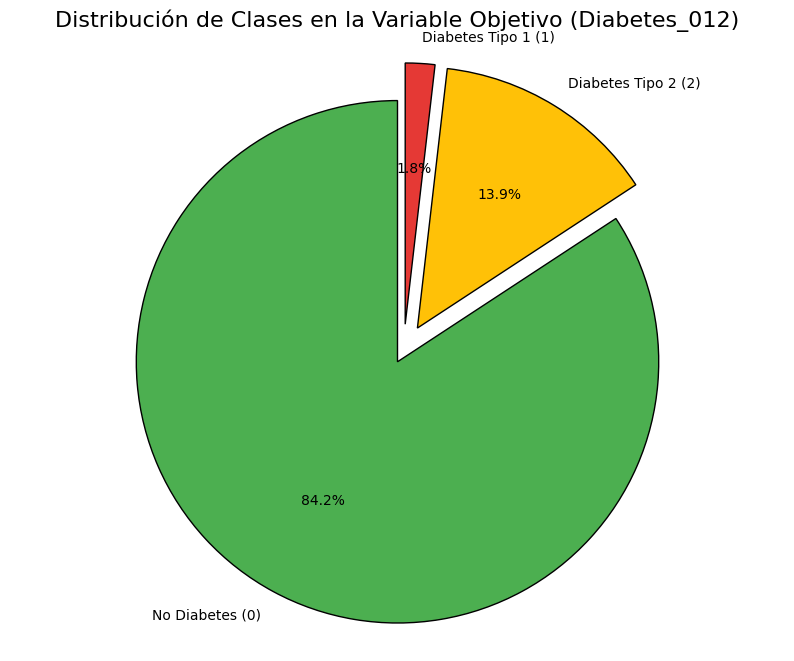


Porcentajes de la Distribución de Clases:
Diabetes_Label
No Diabetes (0)        84.24%
Diabetes Tipo 2 (2)    13.93%
Diabetes Tipo 1 (1)     1.83%
Name: proportion, dtype: object


In [ ]:
# @title
diabetes_labels = {0.0: 'No Diabetes (0)', 1.0: 'Diabetes Tipo 1 (1)', 2.0: 'Diabetes Tipo 2 (2)'}
df['Diabetes_Label'] = df['Diabetes_012'].map(diabetes_labels)

class_counts = df['Diabetes_Label'].value_counts()
class_percentages = df['Diabetes_Label'].value_counts(normalize=True) * 100
labels = class_counts.index

plt.figure(figsize=(10, 8))
plt.pie(
    class_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FFC107', '#E53935'],
    explode=[0.05, 0.1, 0.1],
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribución de Clases en la Variable Objetivo (Diabetes_012)', fontsize=16)
plt.axis('equal')
plt.show()

print("\nPorcentajes de la Distribución de Clases:")
print(class_percentages.round(2).astype(str) + '%')

Después, se crearán gráficos de barra con las variables binarias separadas por el tipo de diabetes y se agruparán para mostrarlos en grupos de tres.

/tmp/ipython-input-1032661589.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí'])
/tmp/ipython-input-1032661589.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí'])
/tmp/ipython-input-1032661589.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí'])
/tmp/ipython-input-1032661589.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí'])
/tmp/ipython-input-1032661589.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí'])


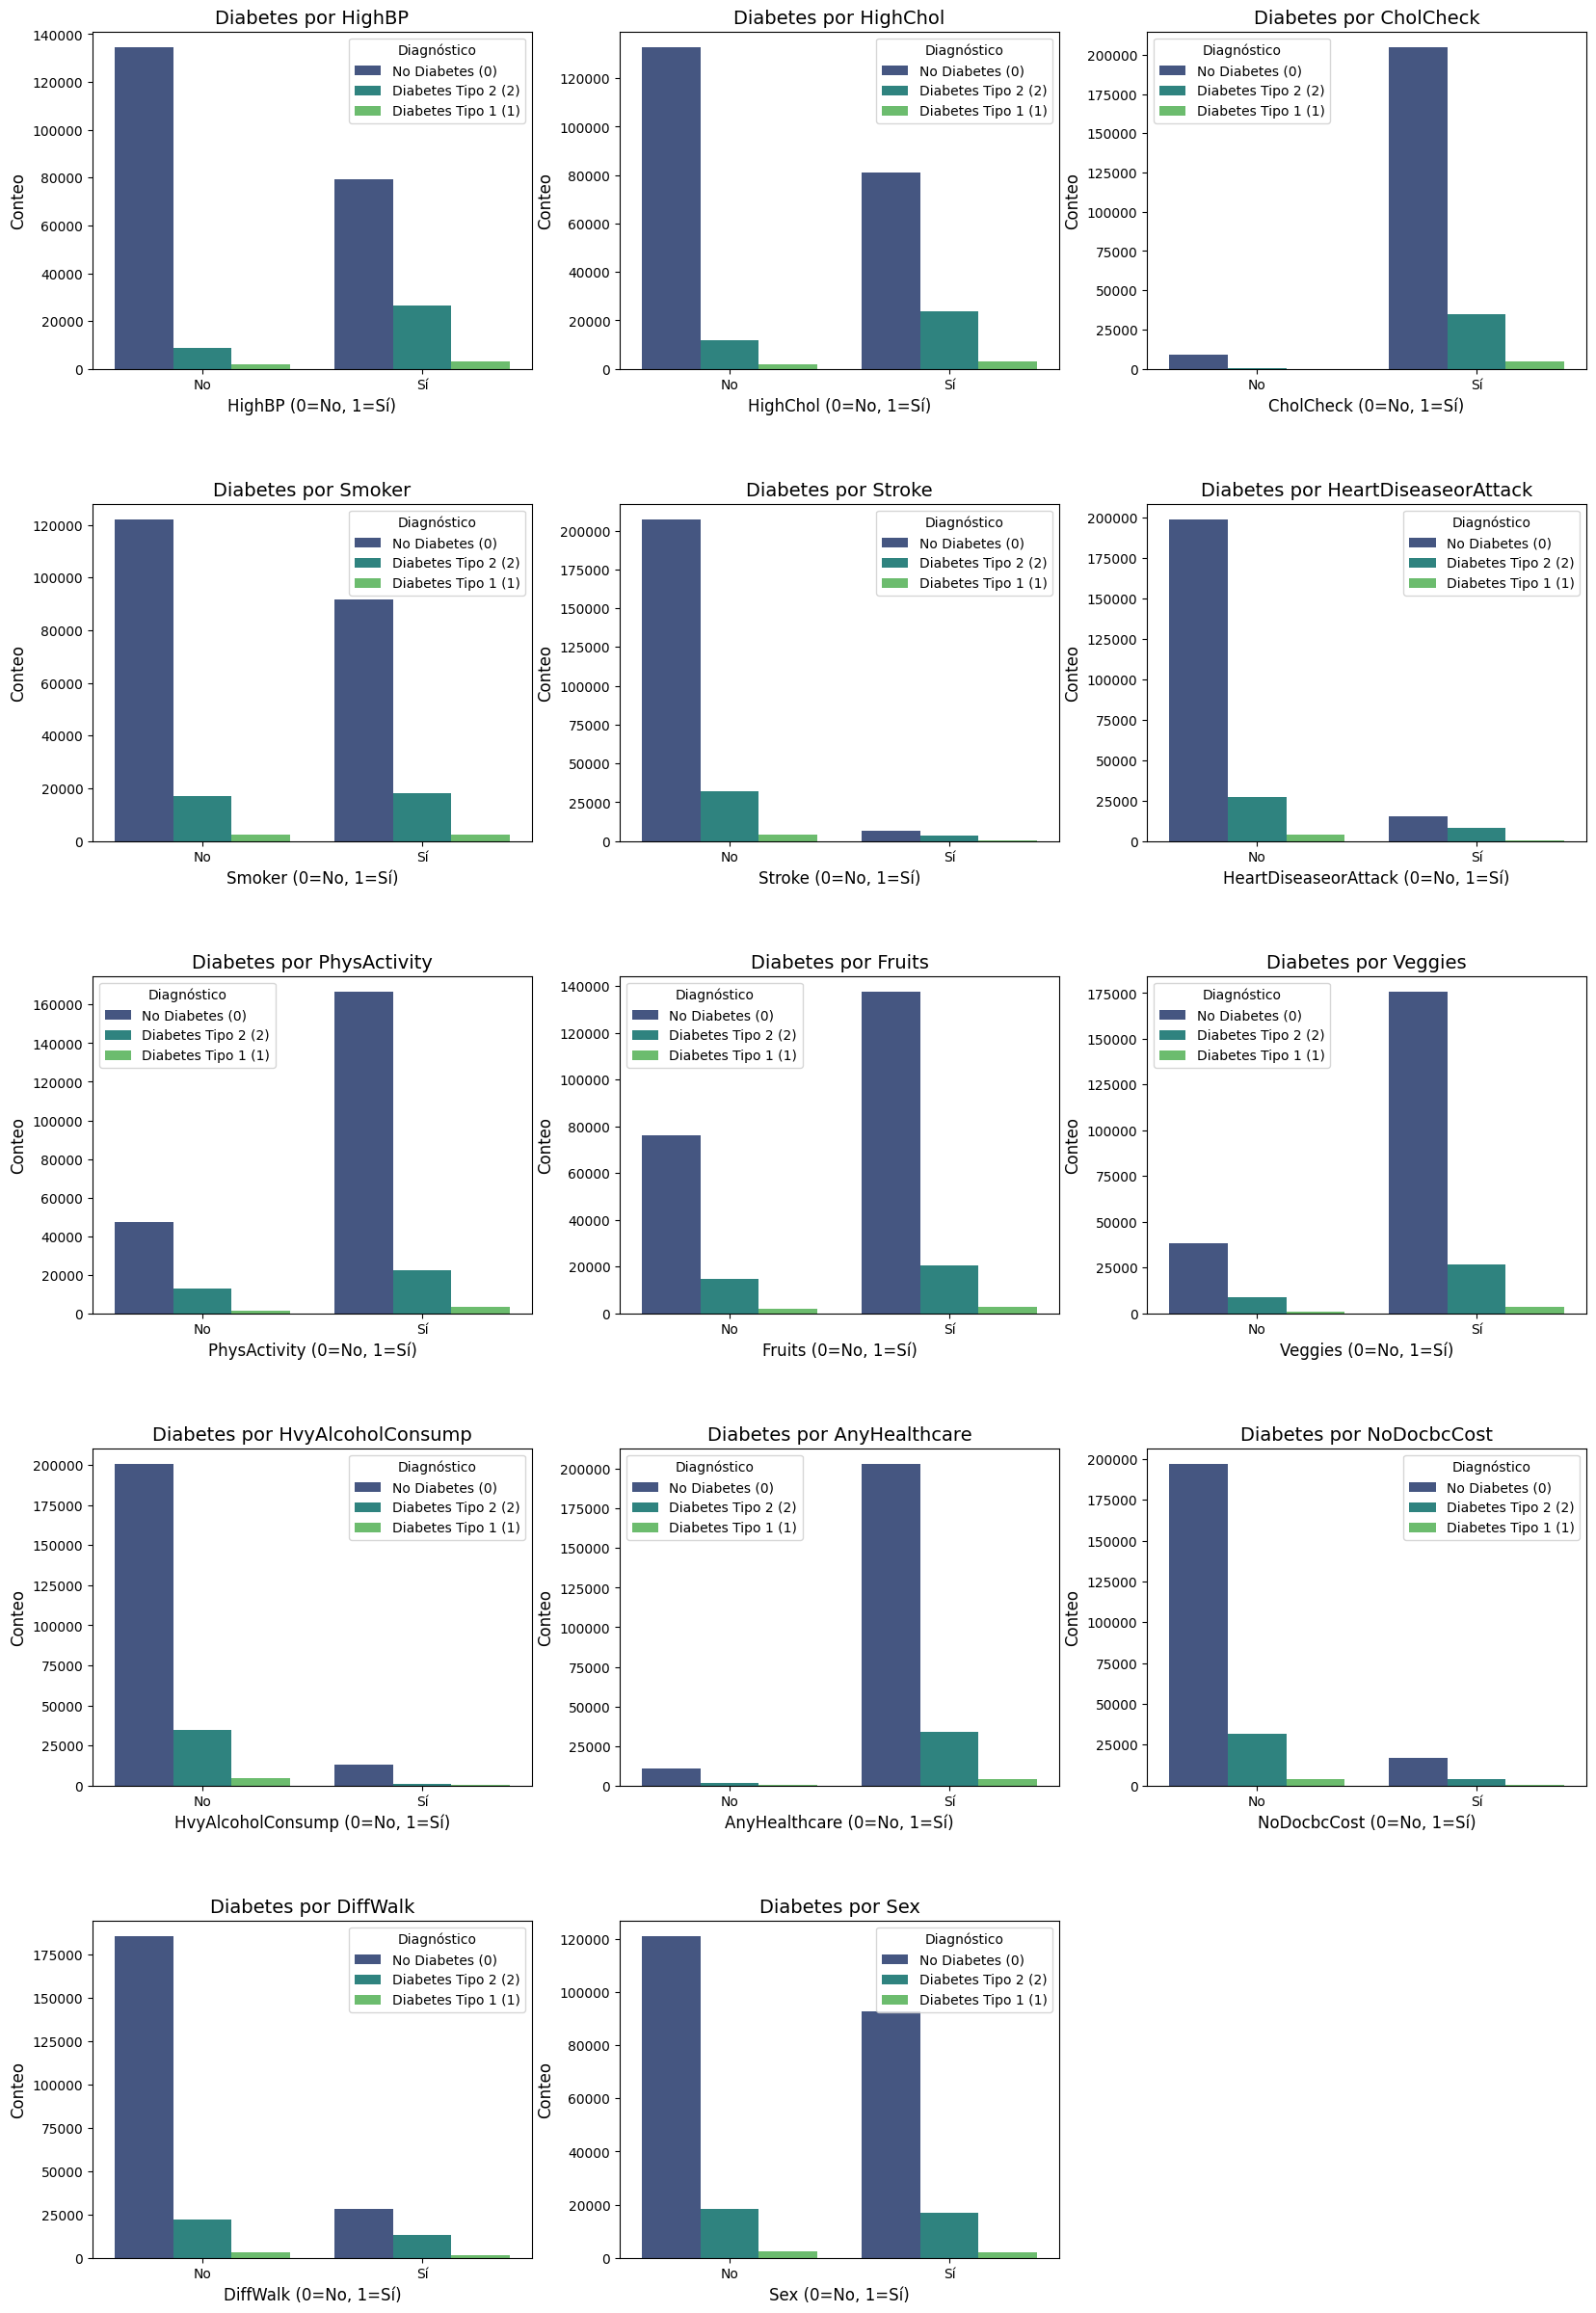


--- Prevalencia de Diabetes DENTRO de cada categoría binaria (%) ---

Tabla de Prevalencia para: HighBP
Diabetes_Label  Diabetes Tipo 1 (1)  Diabetes Tipo 2 (2)  No Diabetes (0)
No                             1.19                 6.04            92.78
Sí                             2.68                24.45            72.88

Tabla de Prevalencia para: HighChol
Diabetes_Label  Diabetes Tipo 1 (1)  Diabetes Tipo 2 (2)  No Diabetes (0)
No                             1.20                 7.98            90.82
Sí                             2.67                22.01            75.31

Tabla de Prevalencia para: CholCheck
Diabetes_Label  Diabetes Tipo 1 (1)  Diabetes Tipo 2 (2)  No Diabetes (0)
No                             0.65                 2.54            96.80
Sí                             1.87                14.37            83.75

Tabla de Prevalencia para: Smoker
Diabetes_Label  Diabetes Tipo 1 (1)  Diabetes Tipo 2 (2)  No Diabetes (0)
No                             1.66          

In [ ]:
# @title
binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

n_cols = 3
n_rows = int(np.ceil(len(binary_cols) / n_cols))
plt.figure(figsize=(20, 6 * n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

for i, col in enumerate(binary_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(
        x=col,
        hue='Diabetes_Label',
        data=df,
        palette='viridis',
        ax=ax
    )
    ax.set_title(f'Diabetes por {col}', fontsize=14)
    ax.set_xlabel(f'{col} (0=No, 1=Sí)', fontsize=12)
    ax.set_ylabel('Conteo', fontsize=12)
    ax.legend(title='Diagnóstico')
    ax.set_xticklabels(['No', 'Sí'])
plt.show()

print("\n--- Prevalencia de Diabetes DENTRO de cada categoría binaria (%) ---")
for col in binary_cols:
    crosstab_norm = pd.crosstab(df[col], df['Diabetes_Label'], normalize='index') * 100
    print(f"\nTabla de Prevalencia para: {col}")
    crosstab_norm.index = ['No', 'Sí']
    print(crosstab_norm.round(2))

Luego creamos histogramas con las variables ordinales para conocer su distribución.

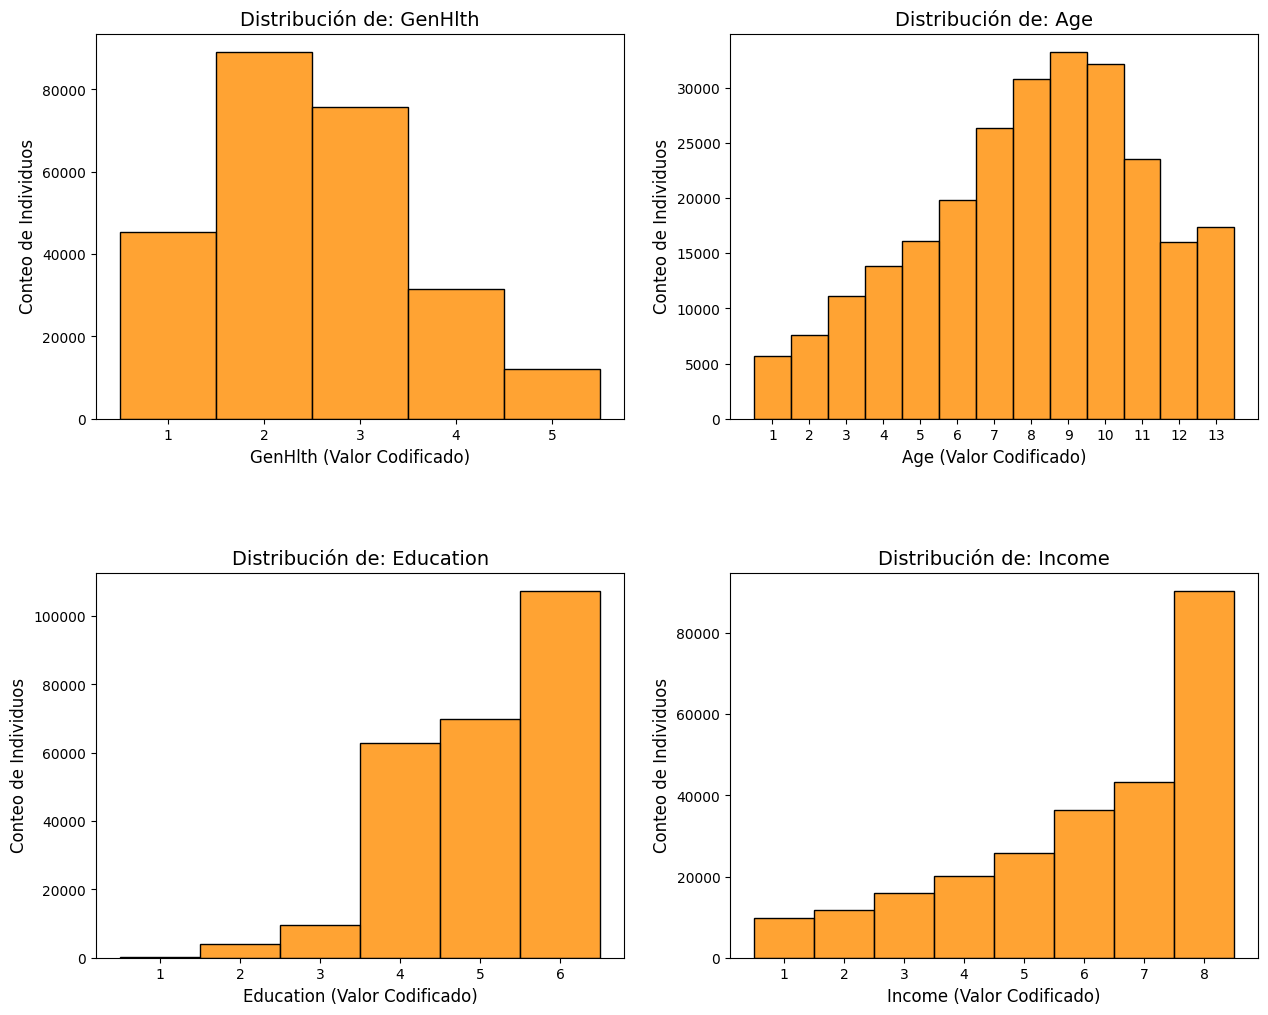


--- Estadísticas Descriptivas de Variables Ordinales y de Conteo ---
               mean       std  min   max
GenHlth    2.511392  1.068477  1.0   5.0
Age        8.032119  3.054220  1.0  13.0
Education  5.050434  0.985774  1.0   6.0
Income     6.053875  2.071148  1.0   8.0


In [ ]:
# @title
ordinal_cols = [
    'GenHlth', 'Age', 'Education', 'Income'
]

n_cols = 2
n_rows = int(np.ceil(len(ordinal_cols) / n_cols))
plt.figure(figsize=(15, 6 * n_rows))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(ordinal_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    sns.histplot(
        data=df,
        x=col,
        kde=False,
        ax=ax,
        color='darkorange',
        alpha=0.8,
        discrete=True if len(df[col].unique()) < 30 else False
    )

    ax.set_title(f'Distribución de: {col}', fontsize=14)
    ax.set_xlabel(f'{col} (Valor Codificado)', fontsize=12)
    ax.set_ylabel('Conteo de Individuos', fontsize=12)

    if len(df[col].unique()) < 15:
        ax.set_xticks(sorted(df[col].unique()))

plt.show()

print("\n--- Estadísticas Descriptivas de Variables Ordinales y de Conteo ---")
print(df[ordinal_cols].describe().T[['mean', 'std', 'min', 'max']])

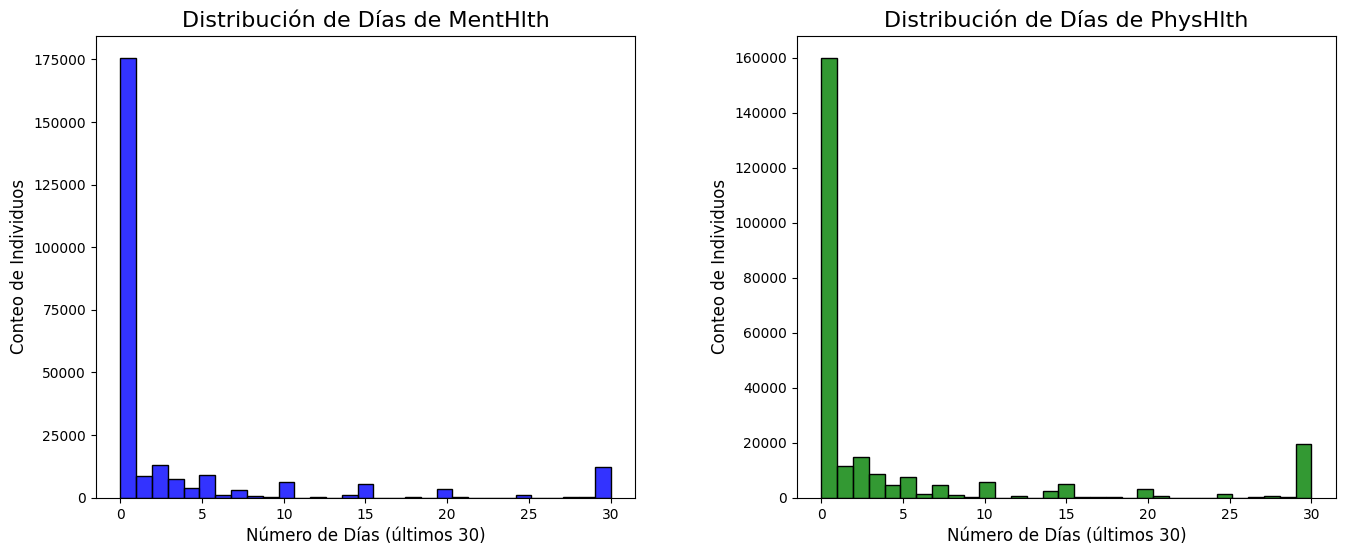


--- Estadísticas Descriptivas ---
          min   max      mean  75%
MentHlth  0.0  30.0  3.184772  2.0
PhysHlth  0.0  30.0  4.242081  3.0


In [ ]:
# @title
health_cols = ['MentHlth', 'PhysHlth']

bins_count = 31

plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.3)

for i, col in enumerate(health_cols):
    ax = plt.subplot(1, 2, i + 1)

    sns.histplot(
        data=df,
        x=col,
        bins=bins_count,
        kde=False,
        ax=ax,
        color='blue' if col == 'MentHlth' else 'green',
        alpha=0.8,
        binrange=(0, 30)
    )

    ax.set_title(f'Distribución de Días de {col}', fontsize=16)
    ax.set_xlabel('Número de Días (últimos 30)', fontsize=12)
    ax.set_ylabel('Conteo de Individuos', fontsize=12)

    ax.set_xticks(np.arange(0, 31, 5))

plt.show()

print("\n--- Estadísticas Descriptivas ---")
print(df[health_cols].describe().T[['min', 'max', 'mean', '75%']])

Por último, generamos el mapa de calor de todas las variables de nuestro dataframe.

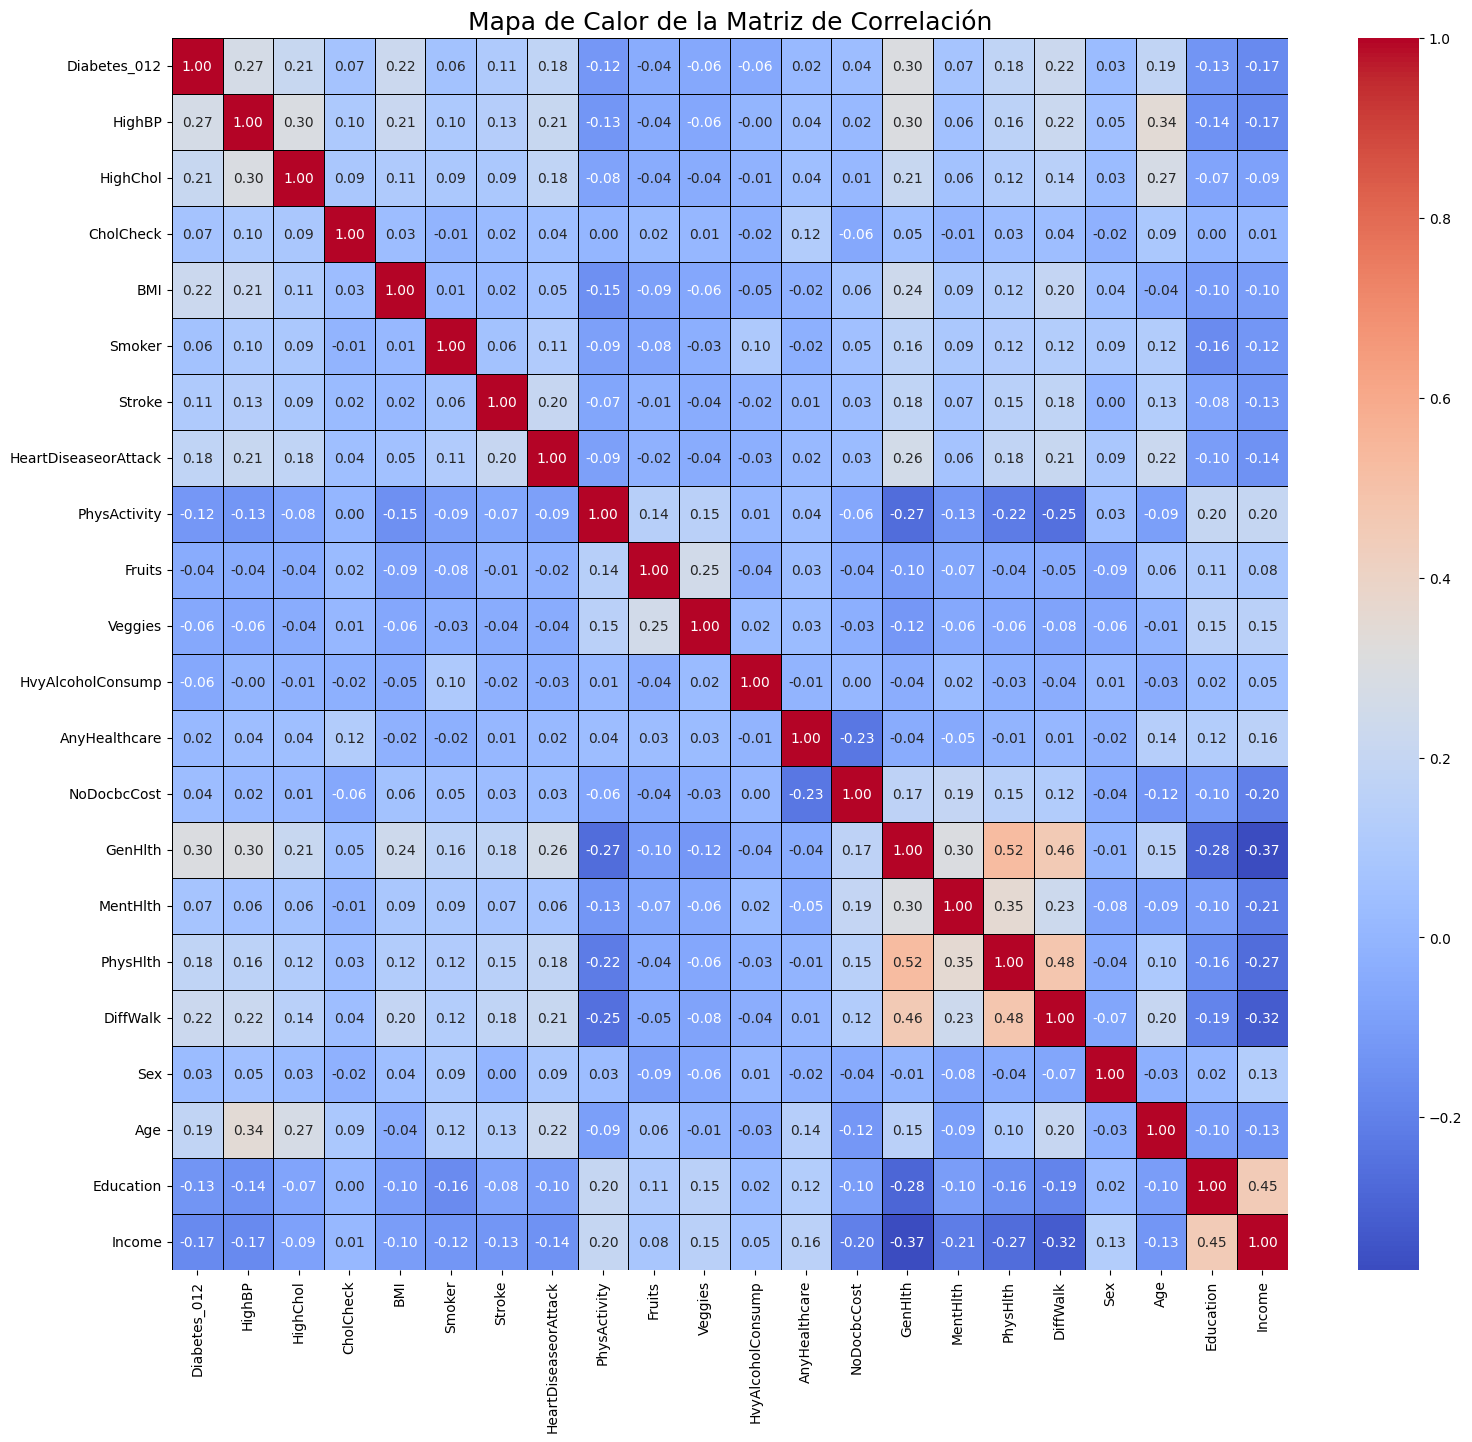


Correlación de las Características con Diabetes_012 (Orden Descendente):
----------------------------------------------------------------------
Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


In [ ]:
# @title
df_corr_final = df.drop(columns=['Diabetes_Label', 'Sex_Label'], errors='ignore')

correlation_matrix = df_corr_final.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5,
    linecolor='black'
)
plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=18)
plt.show()

print("\nCorrelación de las Características con Diabetes_012 (Orden Descendente):")
print("----------------------------------------------------------------------")
print(correlation_matrix['Diabetes_012'].sort_values(ascending=False))

De los graficos mostrados anteriormente podemos sacar algunas conclusiones:

1. Se tiene mucha diferencia entre individuos sin diabetes (más del 80%) e individuos que padecen de algún tipo de diabetes (menos del 20%). Esto podría ocasionar que el modelo no sea capaz de clasificar a individuos con diabetes, pero esto se sabrá una vez que se cree el modelo.
2.  Por los gráficos de barra de CholCheck, PhysActivity, Fruits, Veggies, AnyHealthcare y HvyAlcoholConsump, la mayor parte de los individuos tienen buenos hábitos de cuidado.  
3. Dentro del grupo de personas que han sufrido ataques al corazón, ACV o tienen problemas para caminar, se ve que un tercio de estas tienen diabetes del tipo 2. Sabiendo que la distribución de personas sin diabetes a personas con diabetes es muy grande, esto podría indicar que estos factores pueden ayudarnos a clasificar a individuos dentro del grupo de diabetes del tipo 2.
4. Según la matriz de correlación, las características con mayor correlación con el tipo de diabetes son GenHlth, HighBP y BMI, se puede observar una asociación positiva fuerte. Como la variable objetivo es categórica, esta correlación puede subestimar la relación real, ya que este gráfico mide linealidad, gracias a esto se espera que el conjunto de estas ayude mucho en el entrenamiento con modelos no lineales, como lo serían XGBoost o árboles de decisiones.


# 4.Entrenamiento de los modelos

Se empieza por separar los grupos de entrenamiento y de pruebas con una proporción de 80-20, 80 para entrenamiento y 20 para pruebas.

In [8]:
X = df.copy()
y = X.pop('Diabetes_012')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Se utilizarán tres modelos de clasificación, esto para conocer cuál sería la mejor opción, y luego, poder refinar el mejor para tener el modelo más óptimo. Los modelos serán: Árbol de decisión, random forest y XGBoost.

train
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91    170908
         1.0       0.00      0.00      0.00      3687
         2.0       0.00      0.00      0.00     28349

    accuracy                           0.84    202944
   macro avg       0.28      0.33      0.30    202944
weighted avg       0.71      0.84      0.77    202944

------------------------------------------------------
test
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.00      0.00      0.00      6997

    accuracy                           0.84     50736
   macro avg       0.28      0.33      0.31     50736
weighted avg       0.71      0.84      0.77     50736



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

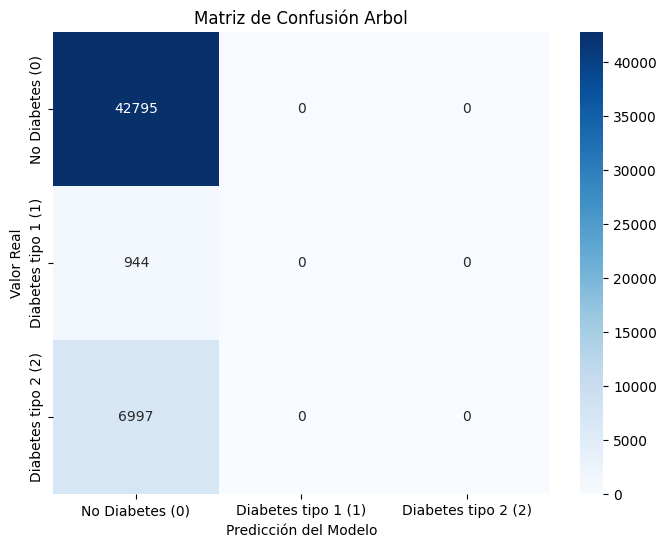

In [ ]:
# @title
# Arbol de desicion
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)
print("train")
print(metrics.classification_report(y_train,y_pred_train_dt))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_test,y_pred_test_dt))

cm = confusion_matrix(y_test, y_pred_test_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)']
)
plt.title(f'Matriz de Confusión Arbol')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()

train
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91    170908
         1.0       0.00      0.00      0.00      3687
         2.0       0.00      0.00      0.00     28349

    accuracy                           0.84    202944
   macro avg       0.28      0.33      0.30    202944
weighted avg       0.71      0.84      0.77    202944

------------------------------------------------------
test
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.00      0.00      0.00      6997

    accuracy                           0.84     50736
   macro avg       0.28      0.33      0.31     50736
weighted avg       0.71      0.84      0.77     50736



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

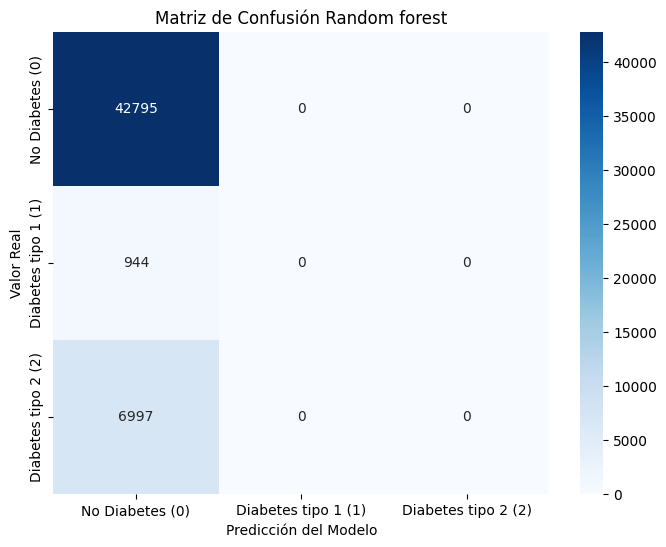

In [ ]:
# @title
# Ramdon Forest
random_forest = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)
print("train")
print(metrics.classification_report(y_train,y_pred_train_rf))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_test,y_pred_test_rf))

cm = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)']
)
plt.title(f'Matriz de Confusión Random forest')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()

train
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    170908
         1.0       0.00      0.00      0.00      3687
         2.0       0.57      0.20      0.30     28349

    accuracy                           0.85    202944
   macro avg       0.48      0.39      0.40    202944
weighted avg       0.81      0.85      0.81    202944

------------------------------------------------------
test
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.56      0.20      0.30      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.82     50736



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

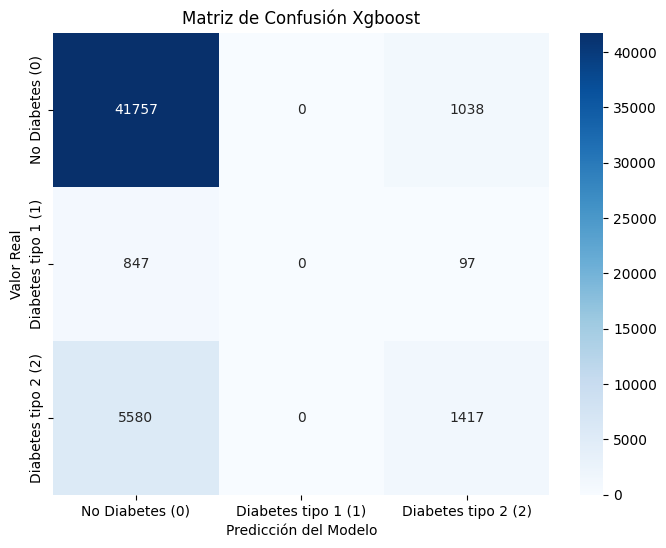

In [ ]:
# @title
# Modelo xgboost
xgboost = XGBClassifier(max_depth=3, eval_metric="logloss", random_state=42)
xgboost.fit(X_train, y_train)
y_pred_train_xgb = xgboost.predict(X_train)
y_pred_test_xgb = xgboost.predict(X_test)
print("train")
print(metrics.classification_report(y_train,y_pred_train_xgb))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_test,y_pred_test_xgb))

cm = confusion_matrix(y_test, y_pred_test_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)']
)
plt.title(f'Matriz de Confusión Xgboost')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()

Podemos observar que tanto árbol de decisión como random forest se vuelven "perezosos", ya que, debido al desequilibrio de clases, es más probable solo clasificar como no diabetes todas las observaciones y tener un error pequeño. Por otro lado, XGBoost logró clasificar de manera correcta algunas observaciones como diabetes tipo 2. Por esto, se decide continuar con XGBoost y buscar el mejor modelo posible modificando los hiperparámetros de este modelo.

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


train
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    170908
         1.0       0.00      0.00      0.00      3687
         2.0       0.58      0.13      0.22     28349

    accuracy                           0.85    202944
   macro avg       0.48      0.37      0.38    202944
weighted avg       0.80      0.85      0.80    202944

------------------------------------------------------
test
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.58      0.14      0.23      6997

    accuracy                           0.85     50736
   macro avg       0.48      0.38      0.38     50736
weighted avg       0.81      0.85      0.81     50736



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

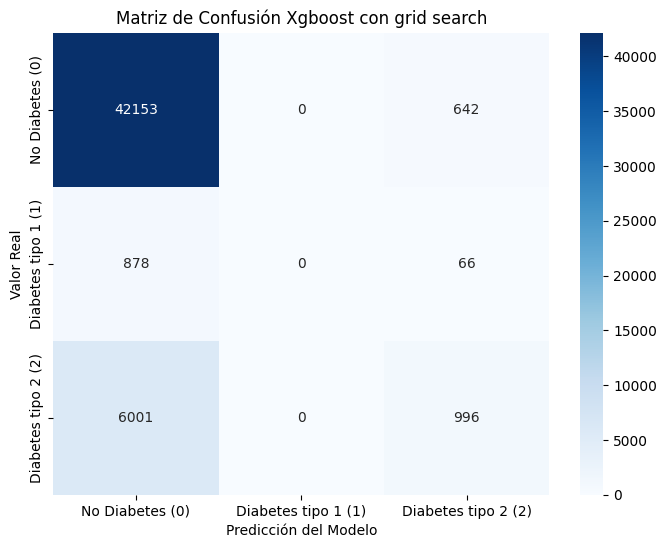

In [ ]:
# @title
# Modelo xgboost con gridsearch
param_grid = {
    # 1. Control de Complejidad y Profundidad del Árbol
    'max_depth': [3, 5, 7],

    # 2. Control de Conservadurismo (Peso Mínimo del Nodo Hoja)
    # Valores más altos hacen el modelo más conservador y ayudan contra el sobreajuste.
    'min_child_weight': [1, 5, 10],

    # 3. Regularización L1 y L2 (Penaliza la complejidad)
    #'gamma': [0.0, 0.1, 0.5], # Mínima pérdida de reducción requerida para hacer una división.
    'lambda': [1, 5, 10],     # Regularización L2 (peso de las hojas)

    # 4. Tasa de Aprendizaje
    # Se recomienda probar valores bajos para un modelo más robusto.
    'learning_rate': [0.05, 0.1],

    # 5. Parámetro de Desbalance Extremo (opcional pero recomendado)
    # Limita el tamaño del paso de corrección. Útil para datos muy desequilibrados.
    'max_delta_step': [0, 1, 3]
}
xgboost = XGBClassifier(eval_metric="logloss", random_state=42)
grid_search = GridSearchCV(estimator=xgboost, param_grid = param_grid, scoring="f1_samples", cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_train_xgbgrid = best_model.predict(X_train)
y_pred_test_xgbgrid = best_model.predict(X_test)
print("train")
print(metrics.classification_report(y_train,y_pred_train_xgbgrid))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_test,y_pred_test_xgbgrid))

cm = confusion_matrix(y_test, y_pred_test_xgbgrid)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)','Diabetes tipo 2 (2)']
)
plt.title(f'Matriz de Confusión Xgboost con grid search')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()

Se puede ver que el modelo no pudo mejorar mucho más de lo que se realizó en la primera ejecución. Aun ajustando varios hiperparámetros, el modelo no es capaz de clasificar diabetes del tipo 1, por esto se decidió unir las clasificaciones de diabetes tipo 1 y 2 en una única clasificación, así el desbalanceo de las clases disminuye un poco. Quedando un modelo binario definido por las variables No diabetes (0) y Diabetes (1).

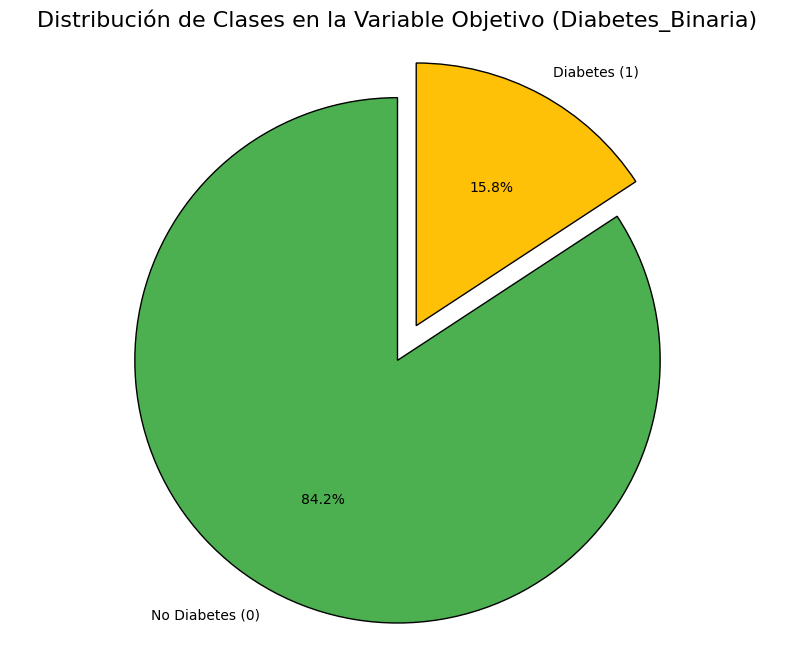


Porcentajes de la Distribución de Clases:
Diabetes_Label
No Diabetes (0)    84.24%
Diabetes (1)       15.76%
Name: proportion, dtype: object

Distribución de Clases:
Diabetes_Binaria
0    213703
1     39977
Name: count, dtype: int64


In [9]:
# @title
df_binario = df.copy()
df_binario['Diabetes_Binaria'] = df['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)
df_binario.drop(columns=['Diabetes_012'], inplace=True)
X_binario = df_binario.copy()
y_binario = X_binario.pop('Diabetes_Binaria')
X_binario_train, X_binario_test, y_binario_train, y_binario_test = train_test_split(X_binario, y_binario, test_size=0.2, random_state=42)
# Grafico de torta de diabetes binaria
diabetes_labels = {0: 'No Diabetes (0)', 1: 'Diabetes (1)'}
df_binario['Diabetes_Label'] = df_binario['Diabetes_Binaria'].map(diabetes_labels)

class_counts = df_binario['Diabetes_Label'].value_counts()
class_percentages = df_binario['Diabetes_Label'].value_counts(normalize=True) * 100
labels = class_counts.index

plt.figure(figsize=(10, 8))
plt.pie(
    class_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FFC107'],
    explode=[0.05, 0.1],
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribución de Clases en la Variable Objetivo (Diabetes_Binaria)', fontsize=16)
plt.axis('equal')
plt.show()

print("\nPorcentajes de la Distribución de Clases:")
print(class_percentages.round(2).astype(str) + '%')
print("\nDistribución de Clases:")
print(df_binario['Diabetes_Binaria'].value_counts())

Se realiza un modelo con XGBoost y los resultados que nos dan son mejores que con tres variables.  Igualmente, los resultados no son muy determinantes y se ve que el desbalanceo de las clases afecta mucho al modelo. Se aplicarán métodos de sobremuestreo y submuestreo para tratar de mejorar el rendimiento del modelo.

train
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    170908
           1       0.60      0.21      0.31     32036

    accuracy                           0.85    202944
   macro avg       0.73      0.59      0.61    202944
weighted avg       0.82      0.85      0.82    202944

------------------------------------------------------
test
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42795
           1       0.57      0.21      0.30      7941

    accuracy                           0.85     50736
   macro avg       0.72      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736



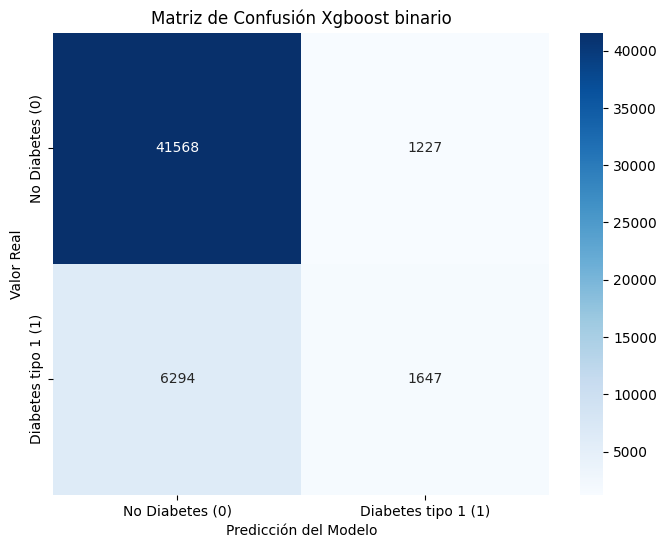

In [ ]:
# @title
# entrenamiento binario con xgboost
xgboost = XGBClassifier(max_depth=3, eval_metric="logloss", random_state=42)
xgboost.fit(X_binario_train, y_binario_train)
y_pred_train_xgb_bi = xgboost.predict(X_binario_train)
y_pred_test_xgb_bi = xgboost.predict(X_binario_test)
print("train")
print(metrics.classification_report(y_binario_train,y_pred_train_xgb_bi))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_binario_test,y_pred_test_xgb_bi))

cm = confusion_matrix(y_binario_test, y_pred_test_xgb_bi)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)']
)
plt.title(f'Matriz de Confusión Xgboost binario')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()


train
              precision    recall  f1-score   support

           0       0.92      0.85      0.89    170908
           1       0.43      0.60      0.50     32036

    accuracy                           0.81    202944
   macro avg       0.68      0.73      0.69    202944
weighted avg       0.84      0.81      0.82    202944

------------------------------------------------------
test
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     42795
           1       0.42      0.59      0.49      7941

    accuracy                           0.81     50736
   macro avg       0.67      0.72      0.69     50736
weighted avg       0.84      0.81      0.82     50736



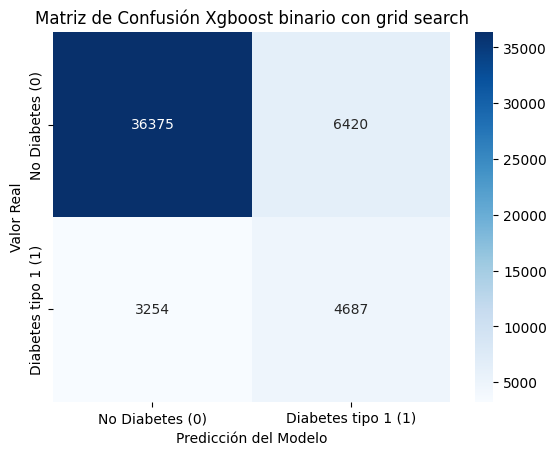

In [ ]:
# @title
# Entrenamiento binario dando mas peso a la clase minoritaria
negativos = 170908
positivos = 32036
proporcion_base = negativos / positivos
param_grid = {
    # 1. Manejo del Desbalance (¡CRÍTICO!)
    # Esto da más peso a los errores en la clase minoritaria (Diabetes).
    'scale_pos_weight': [proporcion_base, proporcion_base * 0.5, proporcion_base * 1.5],

    # 2. Control de Complejidad y Profundidad del Árbol
    'max_depth': [3, 5],

    # 3. Regularización L1 y L2
    # El modelo debe ser conservador para evitar sobreajuste en la clase 1 (minoría).
    'min_child_weight': [1, 5],
    'gamma': [0.0, 0.1], # Mínima pérdida para dividir

    # 4. Tasa de Aprendizaje y Número de Árboles
    'learning_rate': [0.01, 0.05], # Probamos valores más pequeños para mayor robustez
    'n_estimators': [100, 300], # Deben ser más altos si el learning_rate es bajo

    # 5. Muestreo de Características (colsample_bytree)
    # Una forma de regularización: usa solo una parte de las características para cada árbol.
    'colsample_bytree': [0.7, 0.9]
}
xgboost = XGBClassifier(eval_metric="logloss", random_state=42)
grid_search = GridSearchCV(estimator=xgboost, param_grid = param_grid, scoring="f1", cv=3, n_jobs=-1)
grid_search.fit(X_binario_train, y_binario_train)
best_model = grid_search.best_estimator_
y_pred_train_xgbgrid = best_model.predict(X_binario_train)
y_pred_test_xgbgrid = best_model.predict(X_binario_test)
print("train")
print(metrics.classification_report(y_binario_train,y_pred_train_xgbgrid))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_binario_test,y_pred_test_xgbgrid))

cm = confusion_matrix(y_binario_test, y_pred_test_xgbgrid)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)']
)
plt.title(f'Matriz de Confusión Xgboost binario con grid search')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()


Aplicamos el método SMOTE de sobremuestreo, para generar 10.000 observaciones sintéticas de la clase minoritaria, y también se aplica el método TomekLinks para descartar observaciones bordes de la clase mayoritaria. La combinación de estos dos métodos es conocida como SMOTE-Tomek y solo se realiza en el grupo de entrenamiento.

In [10]:
# @title
# --- PASO 1: SMOTE (Sobremuestreo) ---
# (Tu código original)

# 1. Definir los totales finales deseados
num_clase_mayoritaria = 170908  # Mantener sin cambios
num_clase_minoritaria_final = 42036 # 32036 originales + 10000 sintéticas

# 2. Crear el diccionario para sampling_strategy
sampling_strategy_dict = {
    0: num_clase_mayoritaria,
    1: num_clase_minoritaria_final
}

print("Distribución original:", Counter(y_binario_train))

# Aplicar SMOTE
smote = SMOTE(
    sampling_strategy=sampling_strategy_dict,
    random_state=42,
    k_neighbors=5
)
X_train_smote, y_train_smote = smote.fit_resample(X_binario_train, y_binario_train)

print("Distribución después de SMOTE:", Counter(y_train_smote))


# --- PASO 2: Tomek Links (Submuestreo / Limpieza) ---
# Ahora tomamos los datos resultantes de SMOTE y limpiamos la frontera

print("Aplicando Tomek Links para limpiar fronteras...")

# Inicializamos TomekLinks.
# sampling_strategy='auto' (por defecto) elimina muestras de la clase mayoritaria
# que están demasiado cerca de la minoritaria.
tl = TomekLinks(sampling_strategy='auto', n_jobs=-1)

# ¡OJO! Aquí usamos las variables que salieron del SMOTE (X_train_smote)
X_train_final, y_train_final = tl.fit_resample(X_train_smote, y_train_smote)

print("------------------------------------------------------")
print("Distribución FINAL (SMOTE + Tomek):", Counter(y_train_final))

Distribución original: Counter({0: 170908, 1: 32036})
Distribución después de SMOTE: Counter({0: 170908, 1: 42036})
Aplicando Tomek Links para limpiar fronteras...
------------------------------------------------------
Distribución FINAL (SMOTE + Tomek): Counter({0: 166488, 1: 42036})


train
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    166488
           1       0.76      0.43      0.55     42036

    accuracy                           0.86    208524
   macro avg       0.82      0.70      0.73    208524
weighted avg       0.85      0.86      0.84    208524

------------------------------------------------------
test
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     42795
           1       0.55      0.26      0.36      7941

    accuracy                           0.85     50736
   macro avg       0.71      0.61      0.64     50736
weighted avg       0.83      0.85      0.83     50736



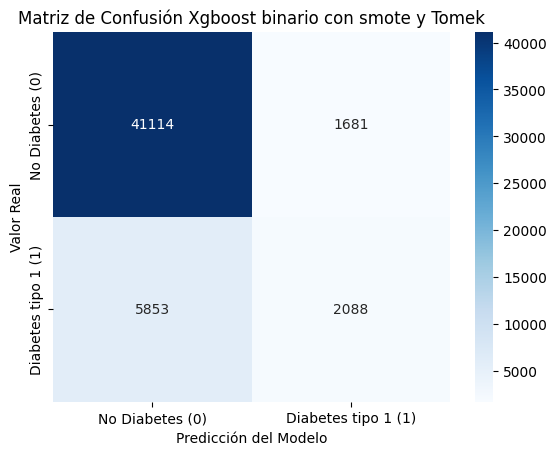

In [ ]:
# @title
xgboost = XGBClassifier(max_depth=3, eval_metric="logloss", random_state=42)
xgboost.fit(X_train_final, y_train_final)
y_pred_train_xgb_bi = xgboost.predict(X_train_final)
y_pred_test_xgb_bi = xgboost.predict(X_binario_test)
print("train")
print(metrics.classification_report(y_train_final,y_pred_train_xgb_bi))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_binario_test,y_pred_test_xgb_bi))

cm = confusion_matrix(y_binario_test, y_pred_test_xgb_bi)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)']
)
plt.title(f'Matriz de Confusión Xgboost binario con smote y Tomek')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()


train
              precision    recall  f1-score   support

           0       0.94      0.78      0.85    166488
           1       0.48      0.80      0.60     42036

    accuracy                           0.78    208524
   macro avg       0.71      0.79      0.73    208524
weighted avg       0.85      0.78      0.80    208524

------------------------------------------------------
test
              precision    recall  f1-score   support

           0       0.94      0.76      0.84     42795
           1       0.36      0.73      0.49      7941

    accuracy                           0.76     50736
   macro avg       0.65      0.75      0.66     50736
weighted avg       0.85      0.76      0.79     50736



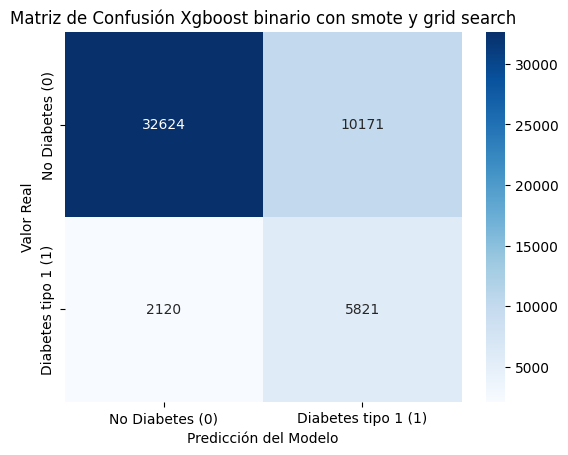

In [12]:
# @title
# Entrenamiento binario con smote, tomek y grid search del mejor modelo ajustando hiperparametros
negativos = 166488
positivos = 42036
proporcion_base = negativos / positivos
param_grid = {
    # 1. Manejo del Desbalance (¡CRÍTICO!)
    # Esto da más peso a los errores en la clase minoritaria (Diabetes).
    'scale_pos_weight': [proporcion_base, proporcion_base * 0.5, proporcion_base * 1.5],

    # 2. Control de Complejidad y Profundidad del Árbol
    'max_depth': [3, 5, 7],

    # 3. Regularización L1 y L2
    # El modelo debe ser conservador para evitar sobreajuste en la clase 1 (minoría).
    'min_child_weight': [1, 5],
    'gamma': [0.0, 0.1], # Mínima pérdida para dividir

    # 4. Tasa de Aprendizaje y Número de Árboles
    'learning_rate': [0.01, 0.05], # Probamos valores más pequeños para mayor robustez
    'n_estimators': [100, 300], # Deben ser más altos si el learning_rate es bajo

    # 5. Muestreo de Características (colsample_bytree)
    # Una forma de regularización: usa solo una parte de las características para cada árbol.
    'colsample_bytree': [0.7, 0.9]
}
xgboost = XGBClassifier(eval_metric="logloss", random_state=42)
grid_search = GridSearchCV(estimator=xgboost, param_grid = param_grid, scoring="f1", cv=3, n_jobs=-1)
grid_search.fit(X_train_final, y_train_final)
best_model = grid_search.best_estimator_
y_pred_train_xgbgrid = best_model.predict(X_train_final)
y_pred_test_xgbgrid = best_model.predict(X_binario_test)
print("train")
print(metrics.classification_report(y_train_final,y_pred_train_xgbgrid))
print("------------------------------------------------------")
print("test")
print(metrics.classification_report(y_binario_test,y_pred_test_xgbgrid))

cm = confusion_matrix(y_binario_test, y_pred_test_xgbgrid)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)'],
    yticklabels=['No Diabetes (0)', 'Diabetes tipo 1 (1)']
)
plt.title(f'Matriz de Confusión Xgboost binario con smote y grid search')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()

También desglosamos las variables más importantes para el modelo entrenado, las cuales representan el nivel de importancia que le da el modelo a todas las variables.

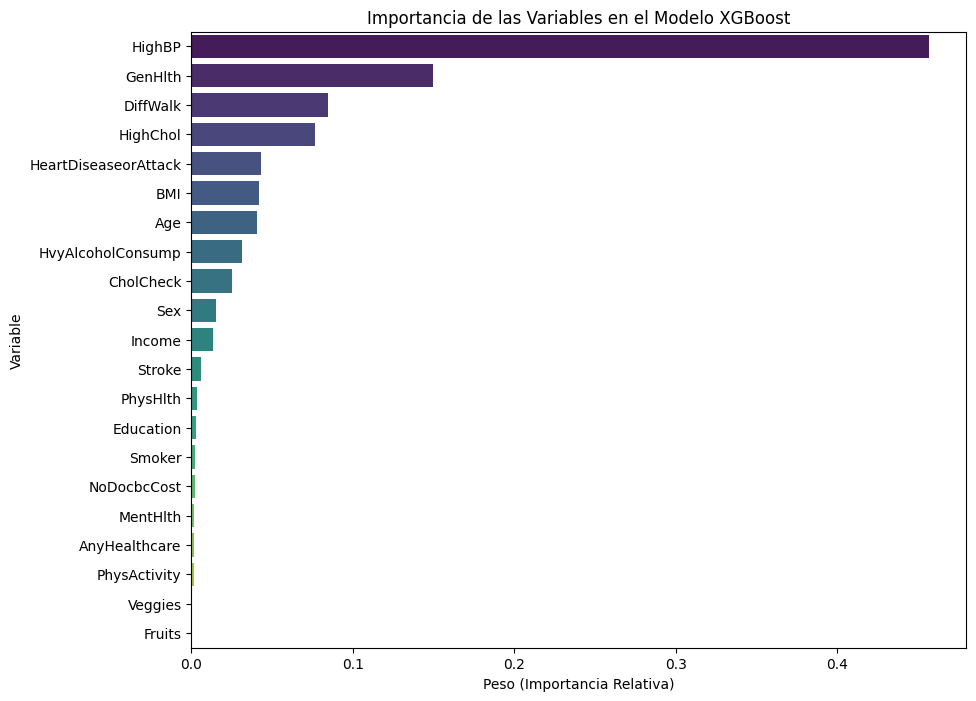

In [ ]:
# @title
# 1. Obtener las importancias del mejor modelo entrenado
# Asegúrate de usar 'best_model' (el resultado de tu GridSearch)
importancias = best_model.feature_importances_

# 2. Obtener los nombres de las columnas
# Debes usar el DataFrame de entrenamiento original (antes de convertirlo a array si lo hiciste)
nombres_columnas = X_binario_train.columns

# 3. Crear un DataFrame para ordenar los datos
df_importancia = pd.DataFrame({
    'Variable': nombres_columnas,
    'Importancia': importancias
})

# Ordenar de mayor a menor importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# 4. Graficar
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_importancia,
    x='Importancia',
    y='Variable',
    hue='Variable',
    palette='viridis',
    legend=False
)
plt.title('Importancia de las Variables en el Modelo XGBoost')
plt.xlabel('Peso (Importancia Relativa)')
plt.ylabel('Variable')
plt.show()

Como conclusiones finales:


*   Aunque se aplicaron técnicas para equilibrar las clases, esto no pudo contrarrestar la gran diferencia que hay entre las clases.
*   La variable más importante para el modelo es si el sujeto presenta o no hipertensión, siendo más del 40% de relevancia para esta, siguiéndola de no tan cerca las variables de salud general (15%), dificultad para caminar (9%) y colesterol alto (8%). Saber esto nos puede ayudar en las siguientes iteraciones del modelo.
*   El último modelo sería el mejor para este caso por las siguientes razones:

      1.   Fue el que tuvo la mejor sensibilidad detectando a los pacientes con diabetes, ya que esta subió hasta un 73%, y en cuanto a los pacientes sin diabetes, los pudo detectar con un 76%.
      2.  En cuanto a la precisión, estuvo muy bien detectando a los pacientes sin diabetes (94%), pero estuvo bajo con los pacientes con diabetes (36%).
      3.  Por ser un modelo enfocado al área de salud, se pueden permitir una alta cantidad de falsos positivos, ya que, aunque el modelo lo diagnostique como diabético, se pueden realizar pruebas posteriores para descartar esta patología.

Con estos resultados no se cumple la hipótesis que planteamos al inicio del proyecto, la cual era crear un modelo que superara el 80% en todas las métricas, esto debido en gran parte al desbalanceo entre los pacientes con diabetes y los que no tienen. Sin embargo, con un poco más de muestras de pacientes con diabetes, se puede volver a iterar este modelo y poder llegar al umbral deseado.



